In dieser Aufgabe wird die DFT eines Bildes berechnet und in Fourier- sowie Phasenspektrum zerlegt. Außerdem sollen beide Spektren wieder zusammengefügt werden zu einem Bild.

Dazu werden zunächst zwei Bilder geladen. Das erste Bild wird zudem skaliert, damit beide Bild die gleiche Größe haben.

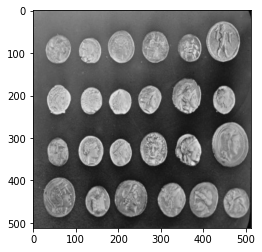

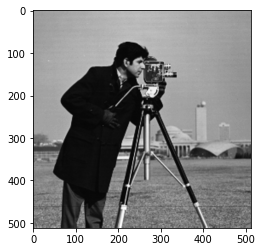

In [91]:
import matplotlib.pyplot as plt
from skimage.data import camera, coins
from skimage.transform import resize
import numpy as np

img = coins()
img = resize(img, (512,512))
img2 = camera()/255.0

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0,vmax=1) 
plt.figure(2)
plt.imshow(img2, cmap='gray', vmin=0,vmax=1) 

Berechnet vom ersten Bild die 2D DFT. Zentriert danach das Ergebnis und berechnet Fourierspektrum und Phasenspektrum. 

In [92]:
F = np.fft.fft2(img)
F_shifted = np.fft.fftshift(F)
magnitude = np.abs(F_shifted)
phase = np.angle(F_shifted)

Visualisiert beide Spektren (`vmin` und `vmax` weglassen). Was ist dort zu sehen? Wie kann man die Visualisierung des Fourierspektrums verbessern?

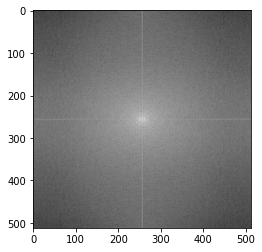

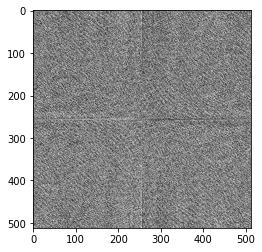

In [93]:
plt.figure(1)
plt.imshow(np.log(magnitude),cmap='gray')
plt.figure(2)
plt.imshow(phase,cmap='gray')

Setzt nun die beiden Spektren wieder zu einer Fouriertransformierten zusammen, macht den Shift rückgängig und wendet die 2D IDFT an. Wie kann man daraus nun wieder das Originalbild ermitteln?

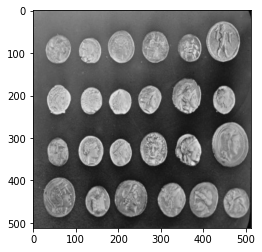

In [94]:
F_new = np.fft.ifftshift(magnitude * np.exp(1j*phase))            
img_new = np.real(np.fft.ifft2(F_new))

plt.imshow(img_new, cmap='gray', vmin=0,vmax=1)

Ändert nun das Fourierspektrum auf einen konstanten Wert > 0 und führt die 2D IDFT erneut durch. Wie wird das so erzeugte Bild aussehen (`vmin` und `vmax` weglassen)?

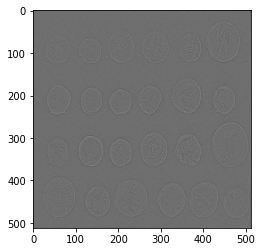

In [89]:
F_new = np.fft.ifftshift(.1 * np.exp(1j*phase))            
img_new = np.real(np.fft.ifft2(F_new))

plt.imshow(img_new, cmap='gray')

Ändert nun das Phasenspektrum konstant auf 0 und behaltet das ursprüngliche Fourierspektrum. Führt wieder die 2D IDFT durch. Was ist nun auf dem Bild zu sehen?

Vergleicht den mittleren Grauwert des neuen Bildes mit dem Originalbild.

0.37981884900443985 0.3798188490044399


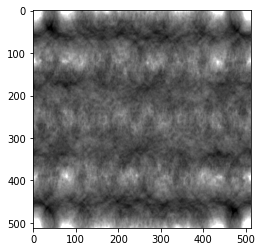

In [96]:
F_new = np.fft.ifftshift(magnitude * np.exp(1j*0))            
img_new = np.real(np.fft.ifft2(F_new))

print(np.mean(img_new), np.mean(img))

plt.imshow(img_new, cmap='gray', vmin=0,vmax=1)

Führt nun die 2D DFT auf dem zweiten Bild durch und berechnet die zentrierten Fourier- und Phasenspektren. 

In [95]:
F2 = np.fft.fft2(img2) 
F2_shifted = np.fft.fftshift(F2) 
magnitude2 = np.abs(F2_shifted) 
phase2 = np.angle(F2_shifted) 

Erzeugt nun eine gemischte Fouriertransformierte aus dem Fourierspektrum des zweiten Bildes und dem Phasenspektrum des ersten Bildes. Führt wieder die 2D IDFT durch und visualisiert das Ergebnis. Was wird zu sehen sein?

Vergleicht den mittleren Grauwert des neuen Bildes mit dem Original des zweiten Bildes.

0.46397648231655936 0.4639764823165595


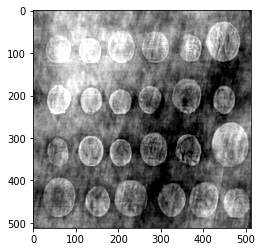

In [97]:
F_new = np.fft.ifftshift(magnitude2 * np.exp(1j*phase))            
img_new = np.real(np.fft.ifft2(F_new))

print(np.mean(img_new), np.mean(img2))

plt.imshow(img_new, cmap='gray', vmin=0,vmax=1)